In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 2]


import scipy.stats as stats
from scipy.stats import boxcox

from sklearn.metrics import  make_scorer
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
df_train = pd.read_csv('C:\\Users\\Gargiadmin\\Desktop\\AUGUST\\train.csv')
df_test = pd.read_csv('C:\\Users\\Gargiadmin\\Desktop\\AUGUST\\test.csv')
display(df_train)
display(df_test)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [4]:
df_train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


<h2><strong>Analyzing Missing Values</strong></h2>


In [5]:


((df_train.isna().sum() / len(df_train) )* 100).to_frame().reset_index().rename(columns={0:'% of missing values','index':'column name'})

,column name,% of missing values
0,id,0.000000
1,product_code,0.000000
2,loading,0.940911
3,attribute_0,0.000000
4,attribute_1,0.000000
5,attribute_2,0.000000
6,attribute_3,0.000000
7,measurement_0,0.000000
8,measurement_1,0.000000
9,measurement_2,0.000000


In [6]:
print(f'total duplicate rows: {df_train.duplicated().sum()}')

total duplicate rows: 0


<h2><strong>Analyzing Distribution of Loading attribute</strong></h2>


<Axes: xlabel='loading', ylabel='Density'>

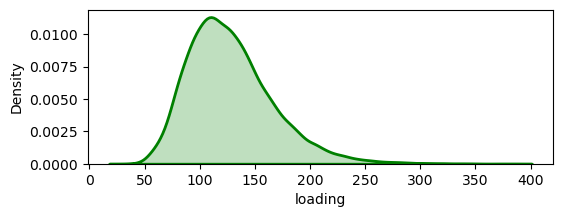

In [7]:
sns.distplot(df_train['loading'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            color ="green")

loading attribute is a continous variable and is rightly skewed gaussian distribution. There are some outliers present which are greater than 250

<h2><strong>Apply various Transformations for better normal distribution</strong></h2>


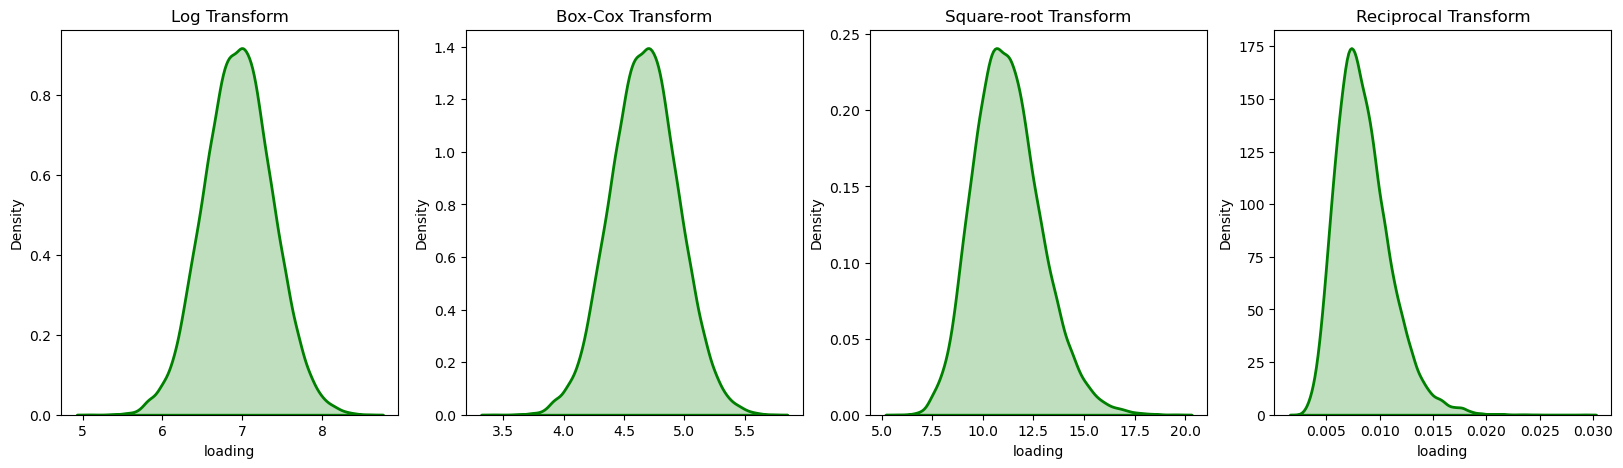

In [8]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 5)

# Log transformation
sns.distplot(np.log2(df_train['loading'] + 1), hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[0])
ax[0].title.set_text('Log Transform')

# Box-Cox transformation (on positive values only)
positive_loading = df_train[df_train['loading'] > 0]['loading']
fitted_data, fitted_lambda = boxcox(positive_loading)

sns.distplot(fitted_data, hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[1])
ax[1].title.set_text('Box-Cox Transform')

# Square root transformation
sns.distplot(np.sqrt(df_train['loading'] + 1), hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[2])
ax[2].title.set_text('Square-root Transform')

# Reciprocal transformation
sns.distplot(1 / (df_train['loading'] + 1), hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[3])
ax[3].title.set_text('Reciprocal Transform')

plt.show()


From above of all the distribution , log Transformation is better than other transformation techniques for loading attribute

In [9]:
print('mean before log-transformation :',df_train['loading'].mean())
print('mean after log-transformation :',np.log2(df_train['loading']).mean())

mean before log-transformation : 127.82623252279635
mean after log-transformation : 6.93390510175576


<h2><strong>Analyzing Distribution of measurement attributes</strong></h2>


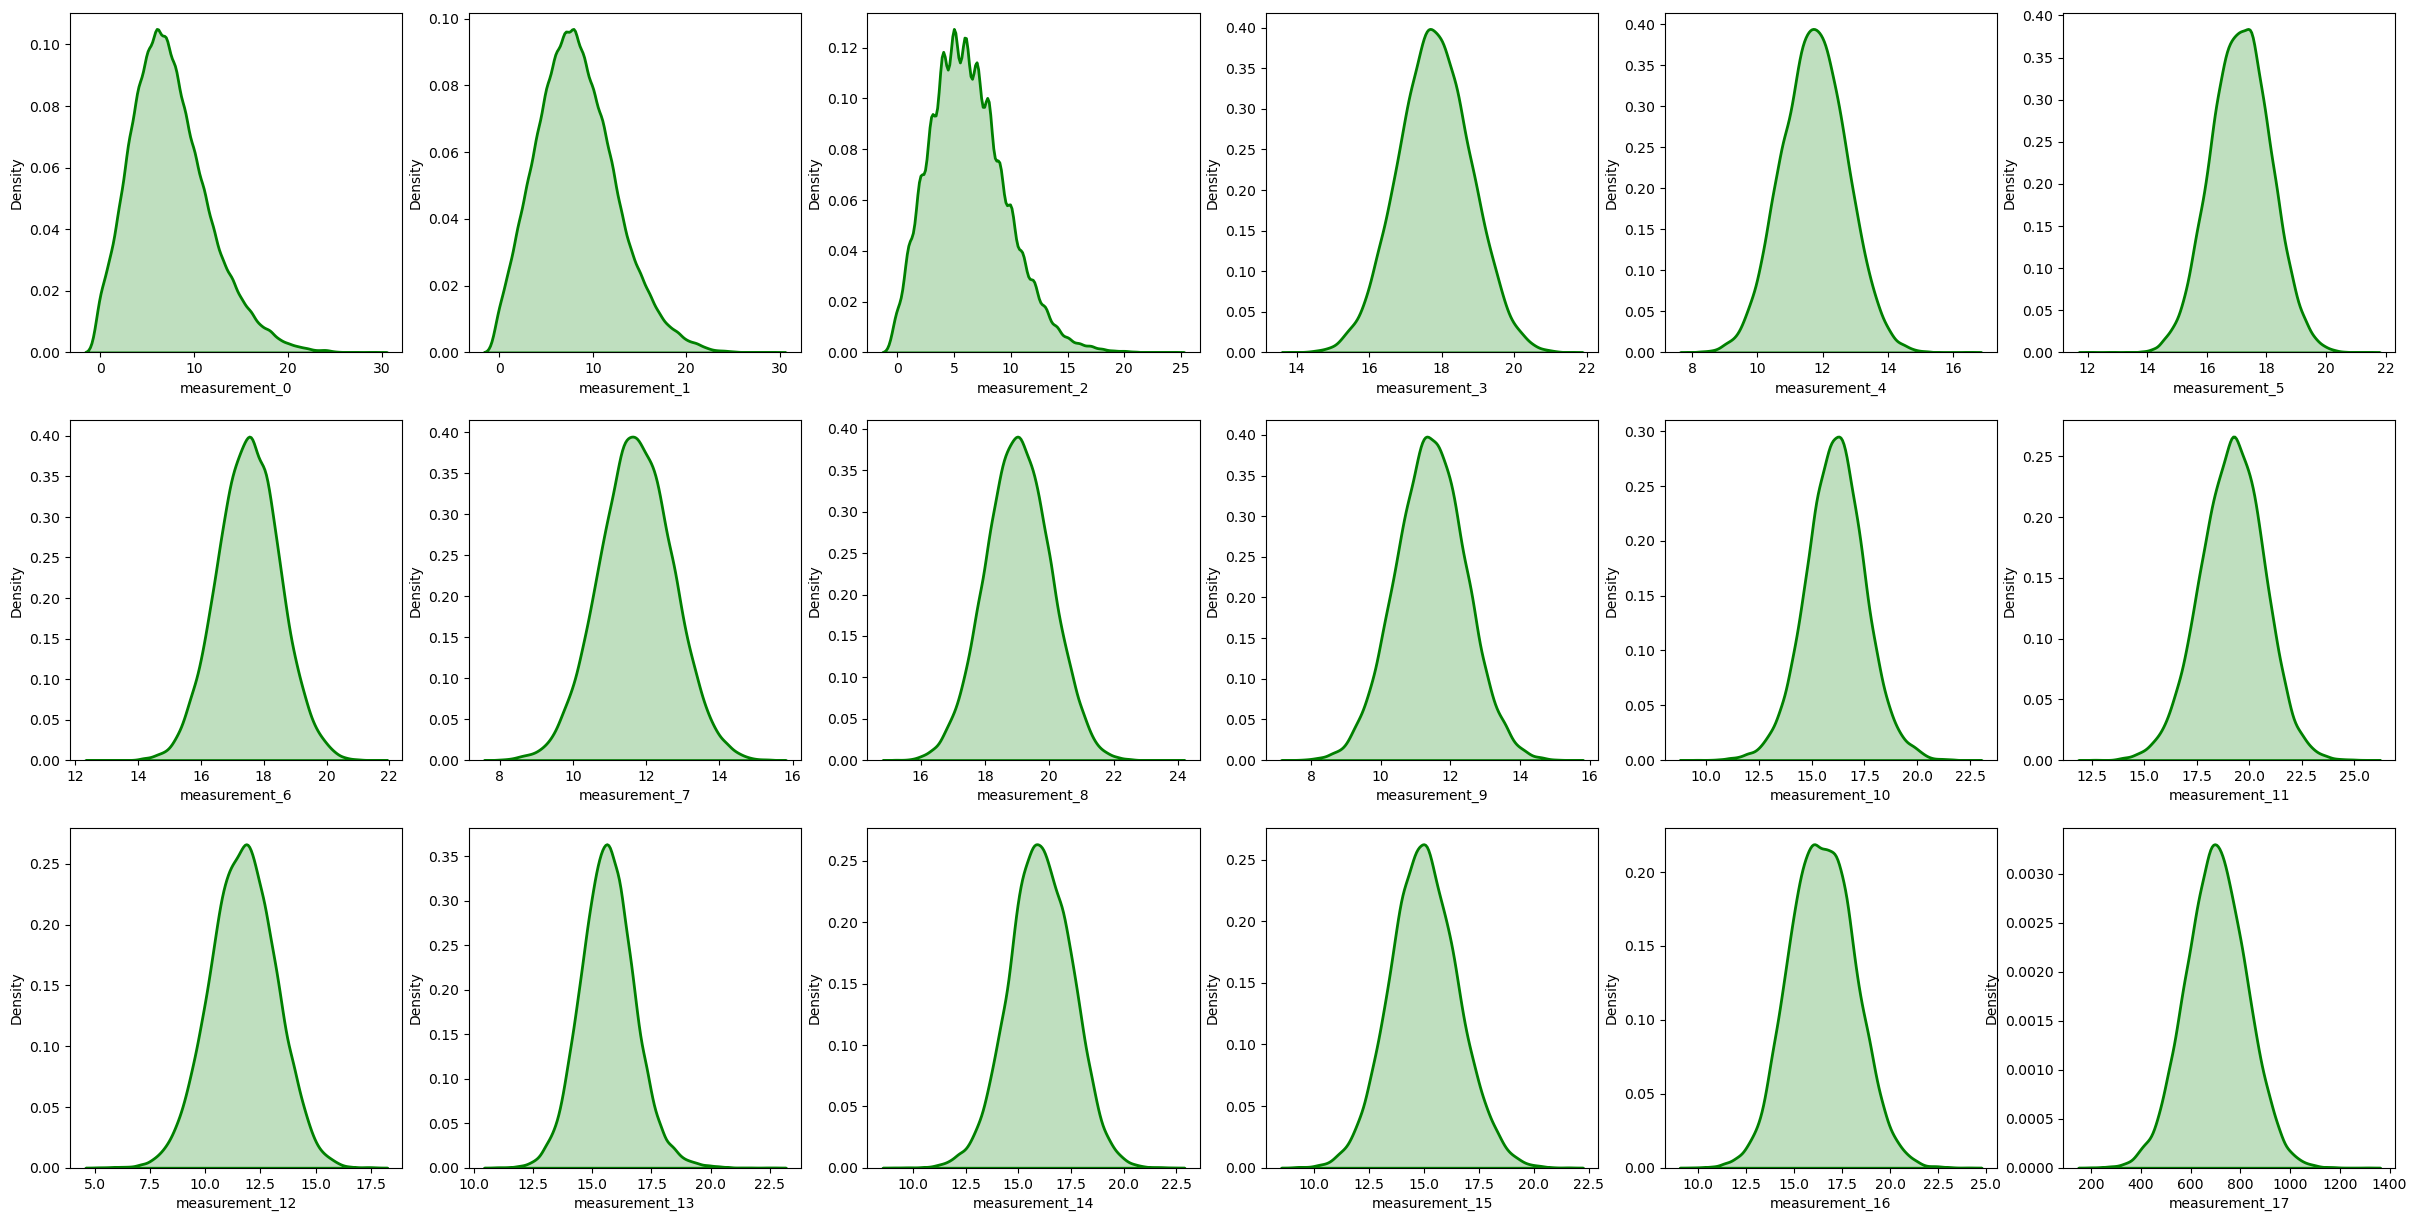

In [10]:
measurement_cols= ['measurement_0','measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']

fig, axes = plt.subplots(nrows = 3, ncols = 6)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 15)

for ax, col in zip(axes, measurement_cols):
    sns.distplot(df_train[col], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            color ="green",ax = ax)

measurement_0,measurement_1,measurement_2 are rightly skewed ,i.e the mean is biased by the values at the far end of the distribution. Therefore, the median is a better option to impute the missing values respectively.
Rest all of the measurements from measurement_3 to measurement_17 are normally distributed , we can impute the missing values by mean .
In Later section, we will impute missing values

<h2><strong>Outlier analysis of Measurement attributes</strong></h2>


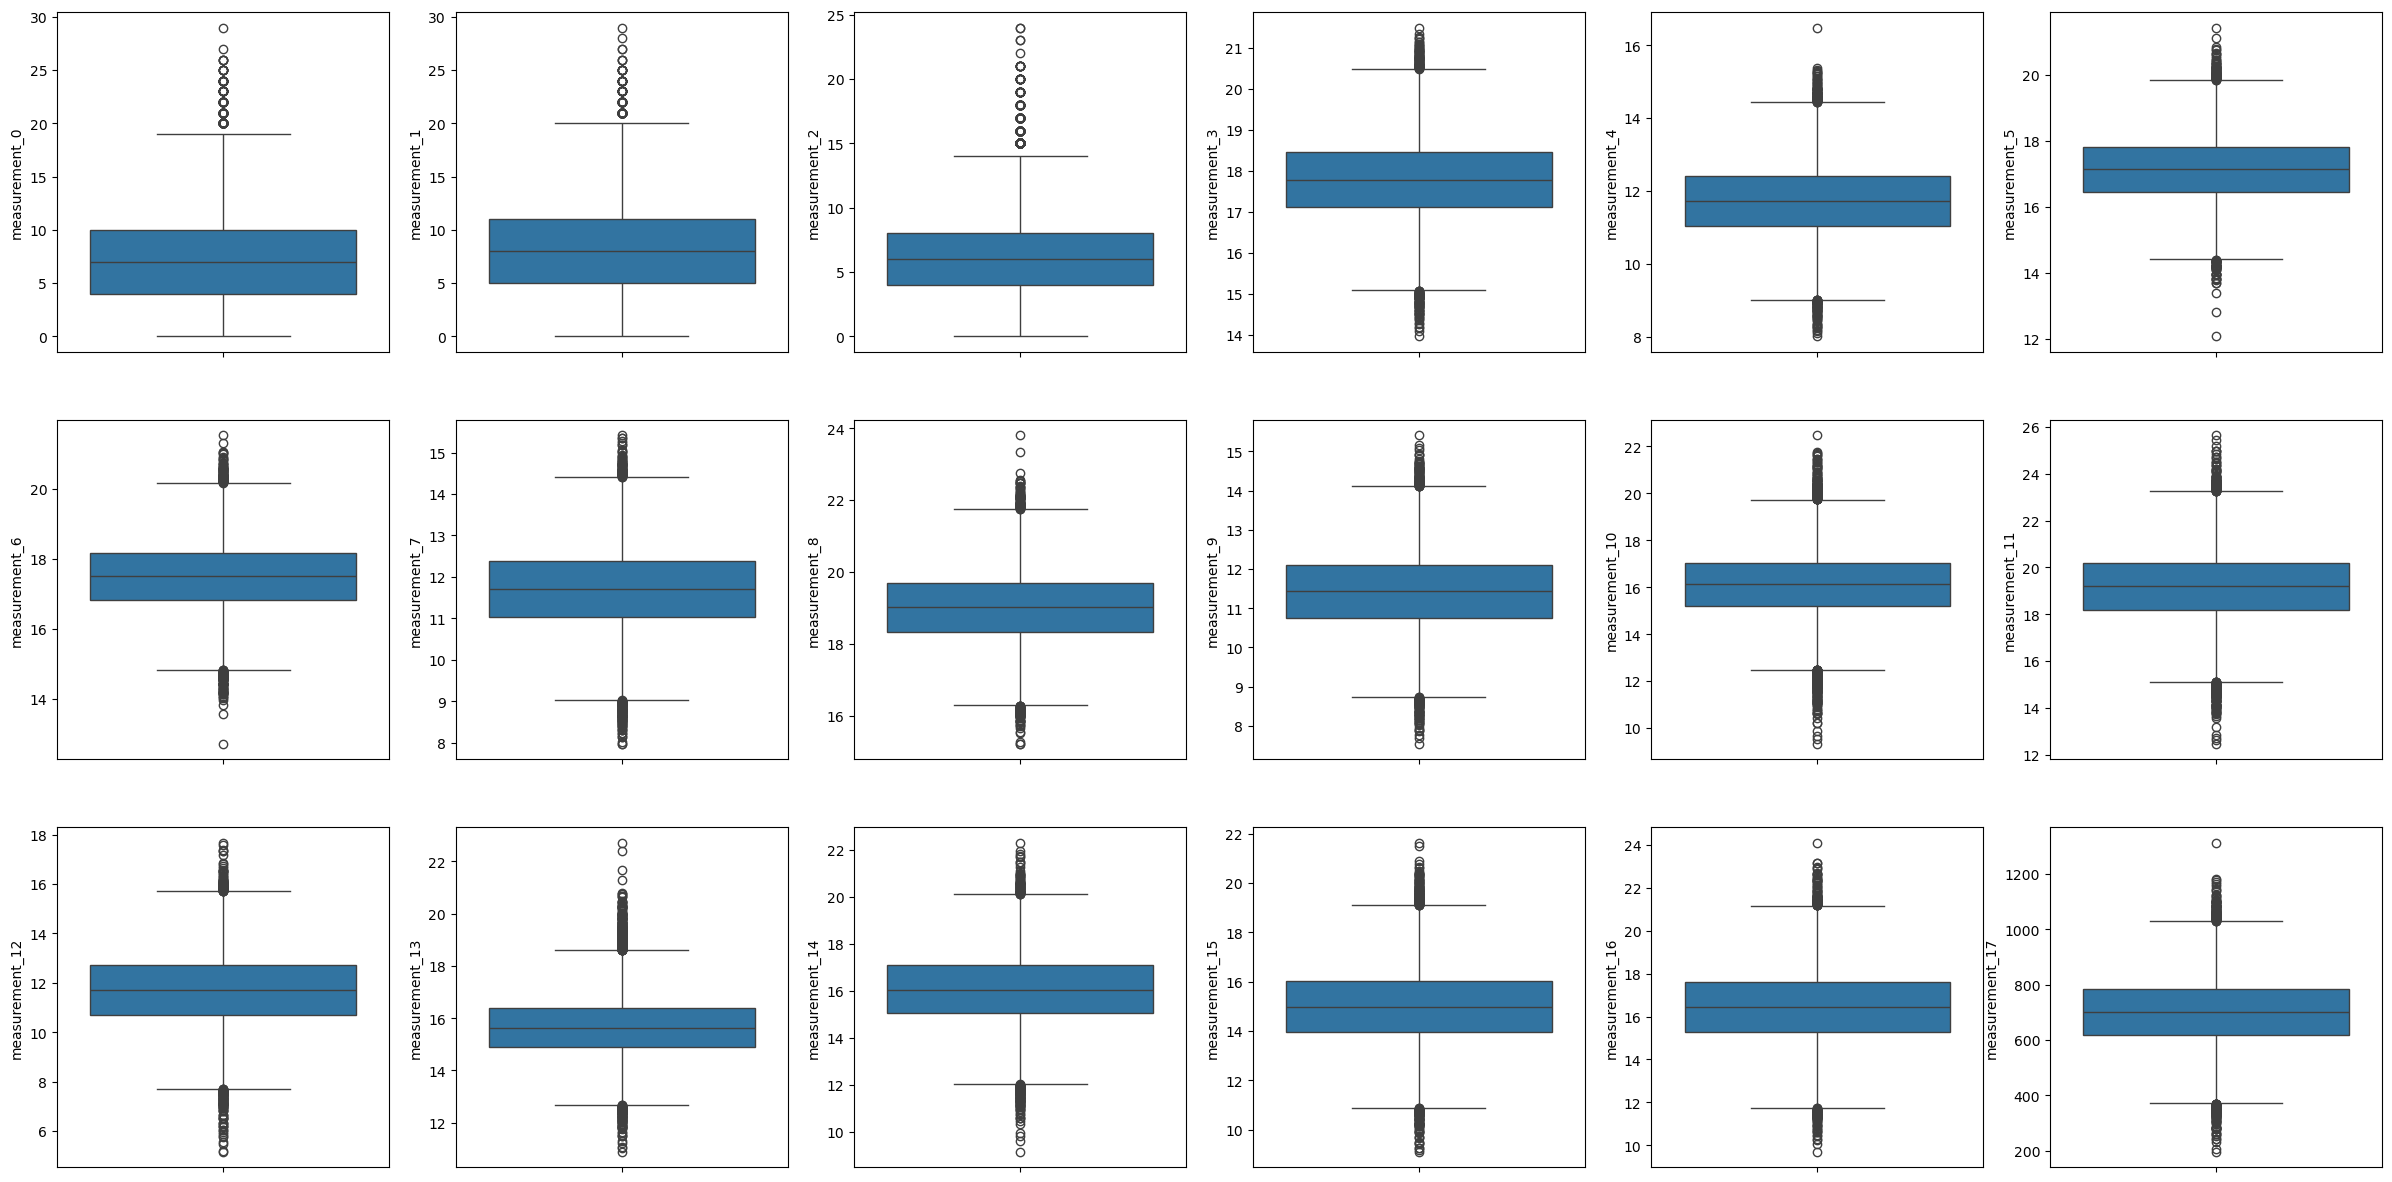

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 6)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 15)

for ax, col in zip(axes, measurement_cols):
    sns.boxplot(df_train[col], ax = ax)

As we have noticed that measurement_0,measurement_1,measurement_2 are rightly skewed
we can confirm this by plotting boxplot which indicates all the outliers lies beyond/ greater than the upper bound of whisker (max) and no points are less than the lower bound of the whisker (min)es

In [12]:
cats = list(df_train.select_dtypes(include=['object']).columns)
nums = list(df_train.select_dtypes(exclude=['object']).columns)

print("categorical variables :")
for i in cats:
    print(i)
print("="*150)
print("\n")
print("Numerical variables :")
for i in nums:
    print(i)

categorical variables :
product_code
attribute_0
attribute_1


Numerical variables :
id
loading
attribute_2
attribute_3
measurement_0
measurement_1
measurement_2
measurement_3
measurement_4
measurement_5
measurement_6
measurement_7
measurement_8
measurement_9
measurement_10
measurement_11
measurement_12
measurement_13
measurement_14
measurement_15
measurement_16
measurement_17
failure


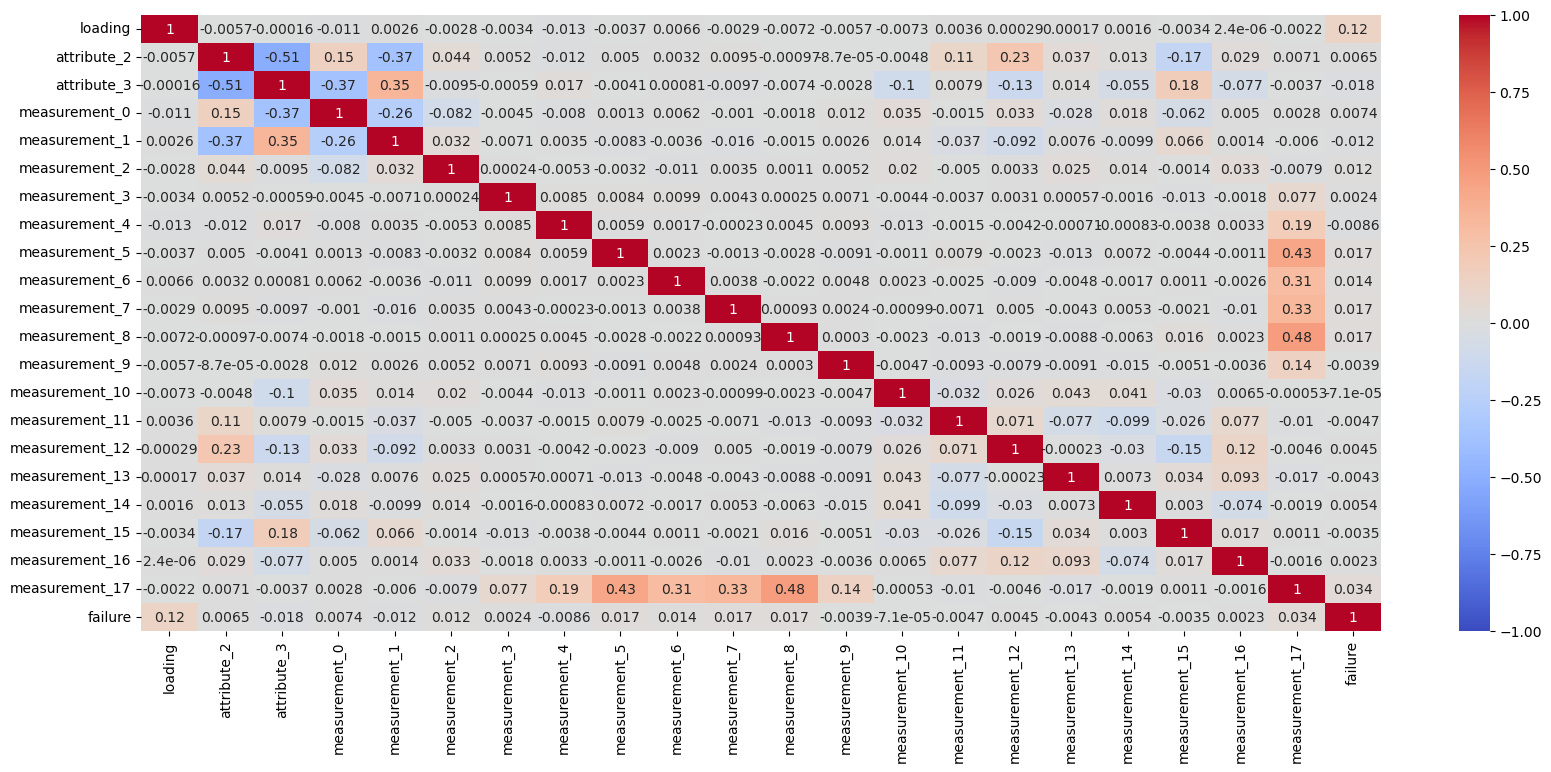

In [13]:
fig = plt.figure(1, (20, 8))

df_num = df_train[nums]
sns.heatmap(df_num.drop('id',axis=1).corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**attribute_2**
- Has a slightly strong negative correlation with attribute_3
- Has a positive correlation with measurement_0, measurement_11, measurement_12
- Has a negative correlation with measurement_1, measurement_15

**attribute_3**
- Has a negative correlation with attribute_2, measurement_0, measurement_10, and measurement_12
- Has a positive correlation with measurement_1 and measurement_15

**measurement_0**
- Has a negative correlation with attribute_3 and measurement_1
- Has a positive correlation with attribute_2

**measurement_17**
- Has a positive correlation with measurement_4, measurement_5, measurement_6, measurement_7, measurement_8, and measurement_9

**failure**
- Has a weak positive correngtition with loading.


In [14]:
# First factorize string (object) columns for computing MI score

df_train["attribute_0_factorized"] = df_train["attribute_0"].factorize()[0]
df_train["attribute_1_factorized"] = df_train["attribute_1"].factorize()[0]

In [15]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [16]:
Y_column = ['failure']
X_columns_attribute = [x for x in df_train.columns.values if x.startswith('attribute_')]
X_columns_loading = ['loading']
X_columns_measurement = [x for x in df_train.columns.values if x.startswith('measurement_')]
X_columns = X_columns_attribute + X_columns_loading + X_columns_measurement
X_columns_attribute_factorized = ["attribute_0_factorized", "attribute_1_factorized", "attribute_2", "attribute_3"]
X = df_train[X_columns_attribute_factorized + X_columns_loading + X_columns_measurement].dropna()
y = df_train.loc[X.index, Y_column]

mi_scores = make_mi_scores(X, y, X.dtypes == int)

In [17]:
mi_scores.sort_values(ascending=False)

loading                   0.006113
measurement_11            0.004204
measurement_3             0.002398
measurement_2             0.001684
measurement_1             0.000724
attribute_2               0.000271
measurement_10            0.000012
measurement_8             0.000000
attribute_3               0.000000
measurement_0             0.000000
measurement_4             0.000000
measurement_5             0.000000
attribute_1_factorized    0.000000
measurement_7             0.000000
measurement_14            0.000000
measurement_6             0.000000
measurement_12            0.000000
measurement_13            0.000000
measurement_15            0.000000
measurement_16            0.000000
measurement_9             0.000000
attribute_0_factorized    0.000000
measurement_17            0.000000
Name: MI Scores, dtype: float64

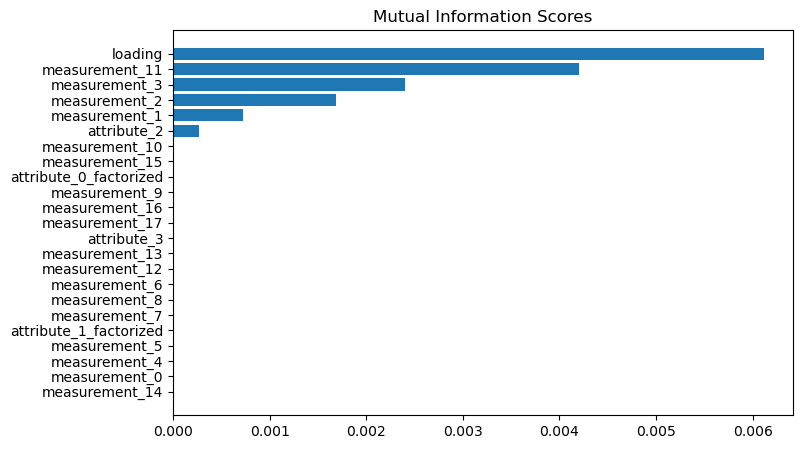

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<h2><strong>Normality Test for Numerical attribute</strong></h2>


In [19]:
def shapiro_wilk_test(df, cols, alpha=0.05):

    for col in cols[:-1]: #loop through all the elements except failure since it is a categorical
        _,p = stats.shapiro(df[col])
        if p <= alpha:
            print(f'''\nRejected H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed''')
        else:
            print(f'''\nFail to reject H0 due to lack of evidence under significance level {alpha}\n{col} seem to be normally distributed''')

nums = [x for x in nums if x != 'id']
shapiro_wilk_test(df_num.drop('id',axis=1),nums)


Fail to reject H0 due to lack of evidence under significance level 0.05
loading seem to be normally distributed

Rejected H0 under significance level 0.05
attribute_2 doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
attribute_3 doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
measurement_0 doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
measurement_1 doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
measurement_2 doesn't seems to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
measurement_3 seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
measurement_4 seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
measurement_5 seem to be normally distributed

Fail to reject H0 due to lack of evidence u

<h2><strong>Distribution of Cateogrical Variables</strong></h2>


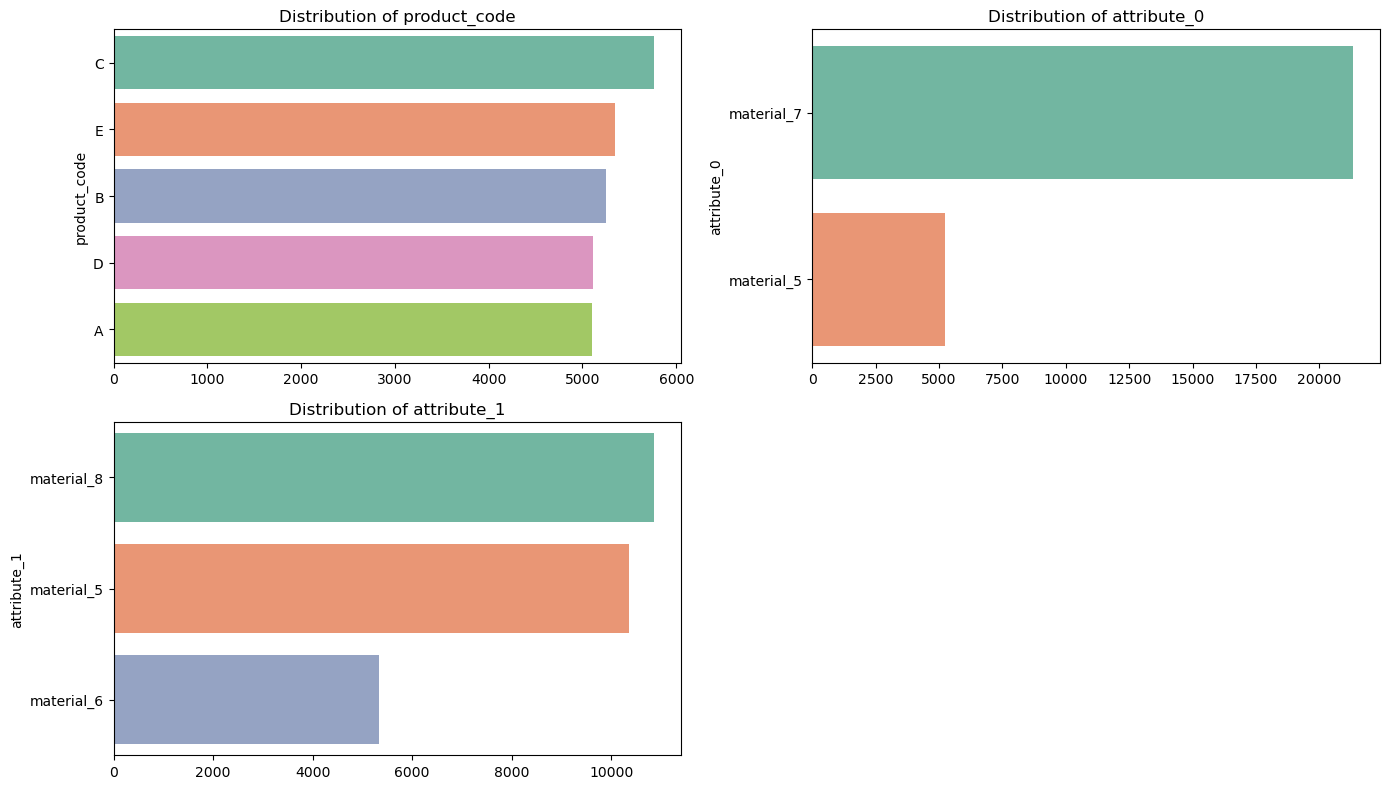

In [20]:
fig = plt.figure(1, (14, 8))

df_cat = df_train[cats]
for i,cat in enumerate(df_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index,palette=sns.color_palette("Set2"))
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()


In [21]:
# calculate proportion of dominant classes in each category
for i,cat in enumerate(df_cat.columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / df_train.shape[0]
    print(f'* `{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

* `C` alone contributes to 21.7% of product_code
* `material_7` alone contributes to 80.24% of attribute_0
* `material_8` alone contributes to 40.89% of attribute_1


<h2><strong>Distribution of target class "failure"></h2>

In [22]:
df_train.failure.value_counts()

failure
0    20921
1     5649
Name: count, dtype: int64

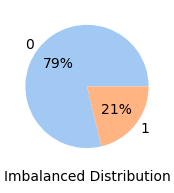

In [23]:
colors = sns.color_palette('pastel')
plt.pie(df_train.failure.value_counts().values, labels = [0,1],colors=colors, autopct='%.0f%%')
plt.xlabel('Imbalanced Distribution')
plt.show()

<h2><strong>Feature engineering</strong></h2>

In [24]:
#transform it into normal distribution
df_train['log_loading'] = np.log2(df_train['loading'])
df_train.insert(2,'log_loading',df_train.pop('log_loading'))

df_test['log_loading'] = np.log2(df_test['loading'])
df_test.insert(2,'log_loading',df_test.pop('log_loading'))

#split data into train and test
from sklearn.model_selection import train_test_split
X = df_train.drop(['id','failure'],axis=1)
y = df_train['failure'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#convert categorical objects to category
for col in ["product_code", "attribute_0", "attribute_1"]:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')
#to handle imbalanced data             
sampler = SMOTE(random_state=42)

#to handle numerical attributes 
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median'))
      ,('scaler', StandardScaler())
])


#to handle categorical  attributes 
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


numeric_features = nums = ['log_loading',
  'loading',
 'attribute_2',
 'attribute_3',
 'measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

categorical_features = cats
#Column Transformer allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

#metric roc_auc score
scoring = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True, needs_threshold=False)

<h2><strong>Logistic Regression Pipeline with GridSearchCV</strong></h2>

In [25]:
#create pipeline
pipeline = imbpipeline(steps = [
               ('preprocessor', preprocessor),
                ('smote',sampler)
              ,('model', LogisticRegression(random_state=42))
           ])

In [26]:
# Import set_config before using it
from sklearn import set_config

# Set the display option
set_config(display="diagram")

# Assuming 'pipeline' is defined earlier in the code
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['log_loading', 'loading',
                                                   'attribute_2', 'attribute_3',
                                                   'measurement_0',
                                                   'measurement_1',
                                                   'measurement_2',
                                                   'measurement_3',
                                                   'measurement_4',
                                                   'measurement_5',
                                                   'measurement_6',
                                                   'measurement_7',
                                                   'me...
                                                   'measurement_14',
                                                   'measurement_15',
                                                   'measurement_16',
                                                   'measurement_17']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['product_code',
                                                   'attribute_0',
                                                   'attribute_1'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

In [27]:
lr = LogisticRegression(random_state=42)

#list of dict parameters to search
params = [
    { "model":[lr],
      'model__solver' : ['saga'],
      'model__penalty' : ['l1', 'l2', 'none'],
      'model__C':np.logspace(-4, 4, 20).tolist()
    },
    { "model":[lr],
      'model__solver' : ['newton-cg', 'lbfgs'],
      'model__penalty' : ['l2','none'],
      'model__C': np.logspace(-4, 4, 20).tolist()
    }
    
    ]
#10 folds
kfold = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)

#grid search
grid = GridSearchCV(
    pipeline,              # Your pipeline object
    params,                # The parameter grid to search
    scoring=scoring,       # Scoring method
    cv=kfold,              # Cross-validation strategy
    return_train_score=True, # Return training scores (useful for analysis)
    n_jobs=-1,             # Use all available cores for parallel processing
    verbose=True           # Verbosity level (prints information about the process)
)
                                  
# fit grid search
best_lr = grid.fit(X_train,y_train)


Fitting 10 folds for each of 140 candidates, totalling 1400 fits


In [28]:
from sklearn.metrics import f1_score, accuracy_score
y_predict_log_regress = best_lr.predict(X_test)

# Calculate F1 score and accuracy
f1_log_regress = f1_score(y_test, y_predict_log_regress)
accuracy_log_regress = accuracy_score(y_test, y_predict_log_regress)

# Print the results
print(f"Logistic Model: F1 Score = {f1_log_regress :0.4f}, Accuracy = {accuracy_log_regress :0.4f}")

Logistic Model: F1 Score = 0.3559, Accuracy = 0.5702


In [29]:
df_v = pd.DataFrame({
    'attribute_2': np.random.rand(100),
    'failure': np.random.rand(100),
    'attribute_3': np.random.rand(100),
    'loading': np.random.rand(100) + 0.1,  # Adding 0.1 to avoid division by zero
    'measurement_0': np.random.rand(100),
    'measurement_1': np.random.rand(100),
    'measurement_2': np.random.rand(100),
    'measurement_3': np.random.rand(100),
    'measurement_4': np.random.rand(100),
    'measurement_9': np.random.rand(100),
    'measurement_10': np.random.rand(100),
    'measurement_17': np.random.rand(100),
    'measurement_0 / loading': np.random.rand(100),
    'measurement_1 / loading': np.random.rand(100),
    'measurement_2 / loading': np.random.rand(100),
    'measurement_3_to_16_mean / loading': np.random.rand(100),
    'measurement_17 / loading': np.random.rand(100),
    'm_3*5_missing': np.random.rand(100),
    'meas_gr1_avg': np.random.rand(100),
    'meas_gr2_avg': np.random.rand(100),
    'failure': np.random.rand(100),
    
    
    
})

Best score: 0.5904087392599008
Best model: {'model': LogisticRegression(random_state=42), 'model__C': 0.004832930238571752, 'model__penalty': 'l1', 'model__solver': 'saga'}


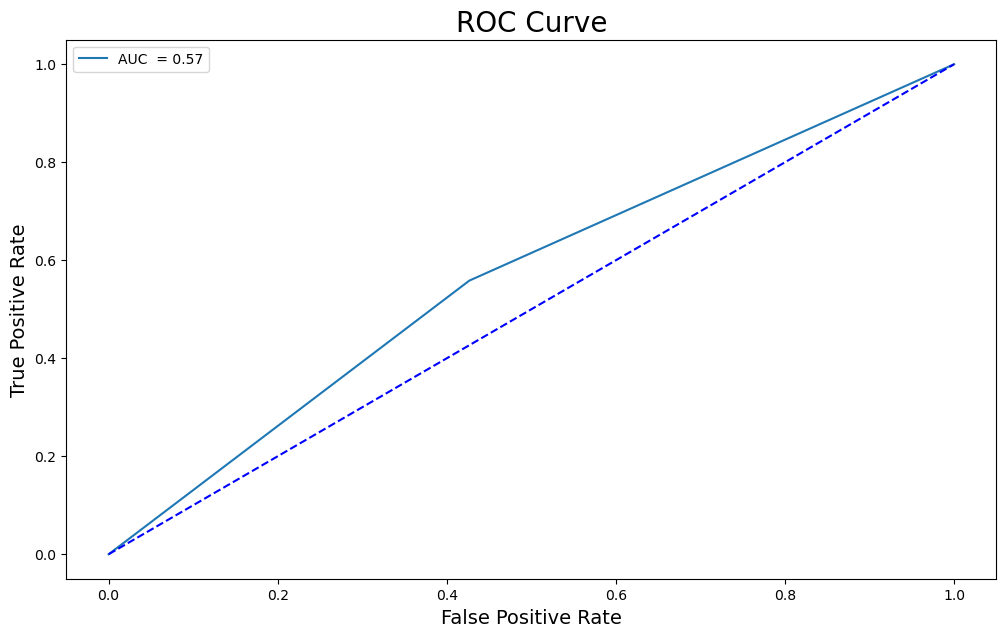

In [30]:
print(f'Best score: {best_lr.best_score_}')
print(f'Best model: {best_lr.best_params_}')

#plot auc_roc score

pred_test = best_lr.predict(X_test)
pred_train = best_lr.predict(X_train)

auc = roc_auc_score(y_test, pred_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pred_test)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

<h2><strong>Referred NB </strong></h2>

In [31]:
df = pd.DataFrame({
    'attribute_2': np.random.rand(100),
    'failure': np.random.rand(100),
    'attribute_3': np.random.rand(100),
    'loading': np.random.rand(100) + 0.1,  # Adding 0.1 to avoid division by zero
    'measurement_0': np.random.rand(100),
    'measurement_1': np.random.rand(100),
    'measurement_2': np.random.rand(100),
    'measurement_3': np.random.rand(100),
    'measurement_4': np.random.rand(100),
    'measurement_9': np.random.rand(100),
    'measurement_10': np.random.rand(100),
    'measurement_17': np.random.rand(100),
    'measurement_0 / loading': np.random.rand(100),
    'measurement_1 / loading': np.random.rand(100),
    'measurement_2 / loading': np.random.rand(100),
    'measurement_3_to_16_mean / loading': np.random.rand(100),
    'measurement_17 / loading': np.random.rand(100),
    'm_3*5_missing': np.random.rand(100),
    'meas_gr1_avg': np.random.rand(100),
    'meas_gr2_avg': np.random.rand(100),
    
    
})

<h2><strong>Referred NB </strong></h2>

In [32]:

# Define the feature engineering function
def create_features(df):
    df['attribute_2*3'] = df['attribute_2'] * df['attribute_3']

    if 'measurement_0' in df.columns and 'loading' in df.columns:
        df['measurement_0 / loading'] = df['measurement_0'] / df['loading']
    if 'measurement_1' in df.columns and 'loading' in df.columns:
        df['measurement_1 / loading'] = df['measurement_1'] / df['loading']
    if 'measurement_2' in df.columns and 'loading' in df.columns:
        df['measurement_2 / loading'] = df['measurement_2'] / df['loading']
    
    measurement_cols = [f"measurement_{i}" for i in range(3, 17) if f"measurement_{i}" in df.columns]
    if measurement_cols:
        df['measurement_3_to_16_mean / loading'] = df[measurement_cols].mean(axis='columns') / df['loading']
    
    if 'measurement_17' in df.columns and 'loading' in df.columns:
        df['measurement_17 / loading'] = df['measurement_17'] / df['loading']

    # Additional feature engineering
    if 'measurement_3' in df.columns:
        df['m3_missing'] = df['measurement_3'].isnull().astype(np.int8)
    if 'measurement_5' in df.columns:
        df['m5_missing'] = df['measurement_5'].isnull().astype(np.int8)
    if 'measurement_3' in df.columns and 'measurement_5' in df.columns:
        df['m_3*5_missing'] = df['m3_missing'] * df['m5_missing']
    
    meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 5)) + list(range(9, 17)) if f"measurement_{i:d}" in df.columns]
    if meas_gr1_cols:
        df['meas_gr1_avg'] = df[meas_gr1_cols].mean(axis=1)
        df['meas_gr1_std'] = df[meas_gr1_cols].std(axis=1)

    meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(5, 9)) if f"measurement_{i:d}" in df.columns]
    if meas_gr2_cols and 'measurement_17' in df.columns:
        df['meas_gr2_avg'] = df[meas_gr2_cols].mean(axis=1)
        

    return df

# Apply the feature engineering
df_transformed = create_features(df.copy())

feature           fail   miss   failure rate       z    p-value
log_loading     :   44 /  250 = 0.176          -1.41      0.157
loading         :   44 /  250 = 0.176          -1.41      0.157
measurement_3   :   61 /  381 = 0.160          -2.50      0.012
measurement_4   :  128 /  538 = 0.238           1.43      0.151
measurement_5   :  172 /  676 = 0.254           2.66      0.008
measurement_6   :  171 /  796 = 0.215           0.15      0.879
measurement_7   :  197 /  937 = 0.210          -0.18      0.860
measurement_8   :  218 / 1048 = 0.208          -0.36      0.716
measurement_9   :  283 / 1227 = 0.231           1.54      0.123
measurement_10  :  277 / 1300 = 0.213           0.04      0.967
measurement_11  :  311 / 1468 = 0.212          -0.07      0.944
measurement_12  :  356 / 1601 = 0.222           0.95      0.340
measurement_13  :  373 / 1774 = 0.210          -0.24      0.809
measurement_14  :  413 / 1874 = 0.220           0.82      0.411
measurement_15  :  430 / 2009 = 0.214   

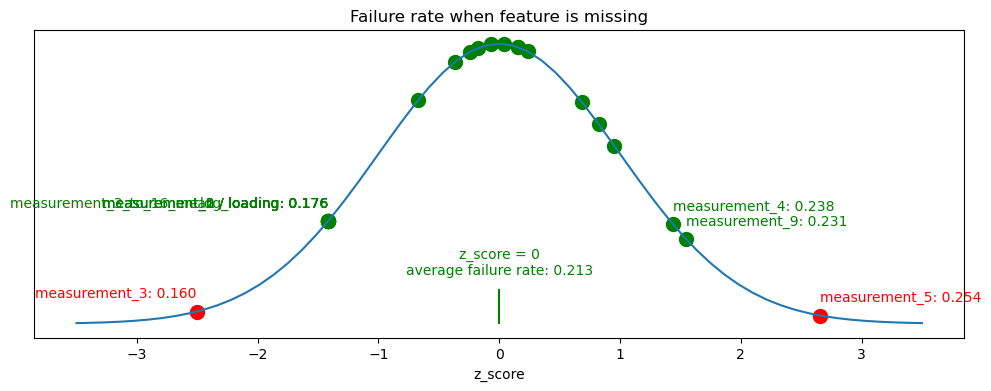

In [45]:
# Start by plotting the bell curve
import scipy
plt.figure(figsize=(12, 4))
z_ticks = np.linspace(-3.5, 3.5, 61)
pdf = scipy.stats.norm.pdf(z_ticks)
plt.plot(z_ticks, pdf)

# Calculate the conditional failure rate for every missing feature
# Print the values and plot them
print('feature           fail   miss   failure rate       z    p-value')
for f in df_train.columns:
    if df_train[f].isna().sum() > 0:
        total = df_train[f].isna().sum()
        fail = df_train[df_train[f].isna()].failure.sum()
        z = (fail / total - 0.212608) / (np.sqrt(0.212608 * (1-0.212608)) / np.sqrt(total))
        plt.scatter([z], [scipy.stats.norm.pdf(z)], c='r' if abs(z) > 2 else 'g', s=100)
        print(f"{f:15} : {fail:4} / {total:4} = {fail/total:.3f}          {z:5.2f}      {2*scipy.stats.norm.cdf(-abs(z)):.3f}")
        if abs(z) > 1: plt.annotate(f"{f}: {fail / total:.3f}",
                                    (z, scipy.stats.norm.pdf(z)),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='left' if z > 0 else 'right',
                                    color='r' if abs(z) > 2 else 'g')
            
# Annotage the center (z=0)
plt.vlines([0], 0, 0.05, color='g')
plt.annotate(f"z_score = 0\naverage failure rate: {0.212608:.3f}",
                                    (0, 0.05),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='center',
                                    color='g')
plt.title('Failure rate when feature is missing')
plt.yticks([])
plt.xlabel('z_score')
plt.show()

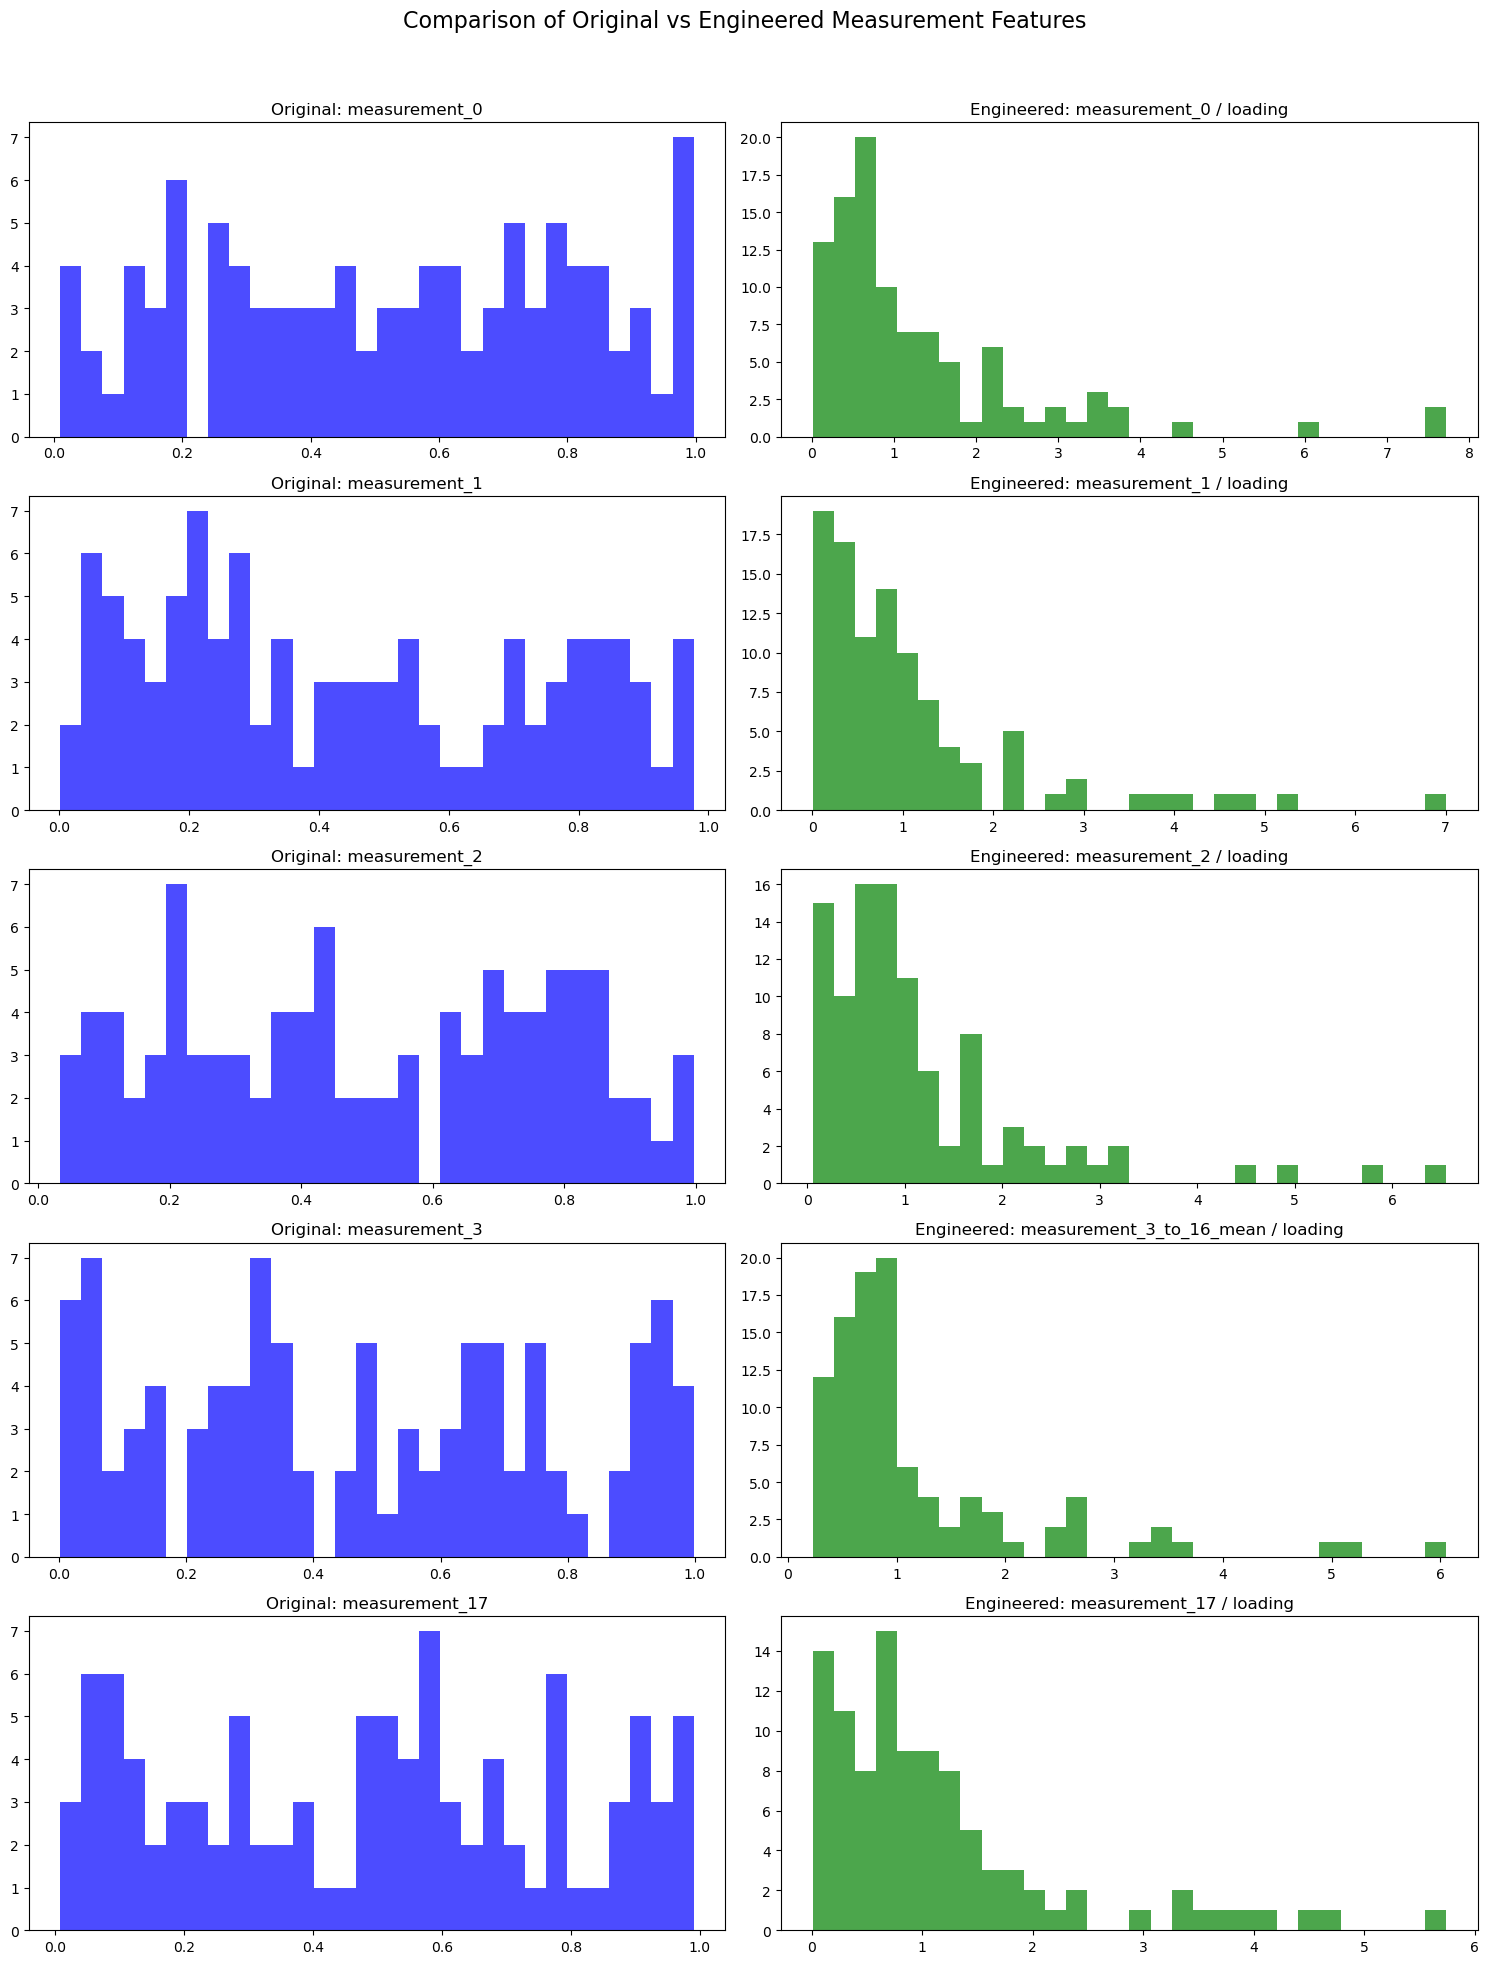

In [33]:
import matplotlib.pyplot as plt

# Set up the subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Comparison of Original vs Engineered Measurement Features', fontsize=16)

# Plot histograms for original measurement columns
axes[0, 0].hist(df['measurement_0'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Original: measurement_0')

axes[1, 0].hist(df['measurement_1'], bins=30, color='blue', alpha=0.7)
axes[1, 0].set_title('Original: measurement_1')

axes[2, 0].hist(df['measurement_2'], bins=30, color='blue', alpha=0.7)
axes[2, 0].set_title('Original: measurement_2')

axes[3, 0].hist(df['measurement_3'], bins=30, color='blue', alpha=0.7)
axes[3, 0].set_title('Original: measurement_3')

axes[4, 0].hist(df['measurement_17'], bins=30, color='blue', alpha=0.7)
axes[4, 0].set_title('Original: measurement_17')

# Plot histograms for engineered measurement columns
axes[0, 1].hist(df_transformed['measurement_0 / loading'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Engineered: measurement_0 / loading')

axes[1, 1].hist(df_transformed['measurement_1 / loading'], bins=30, color='green', alpha=0.7)
axes[1, 1].set_title('Engineered: measurement_1 / loading')

axes[2, 1].hist(df_transformed['measurement_2 / loading'], bins=30, color='green', alpha=0.7)
axes[2, 1].set_title('Engineered: measurement_2 / loading')

axes[3, 1].hist(df_transformed['measurement_3_to_16_mean / loading'], bins=30, color='green', alpha=0.7)
axes[3, 1].set_title('Engineered: measurement_3_to_16_mean / loading')

axes[4, 1].hist(df_transformed['measurement_17 / loading'], bins=30, color='green', alpha=0.7)
axes[4, 1].set_title('Engineered: measurement_17 / loading')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


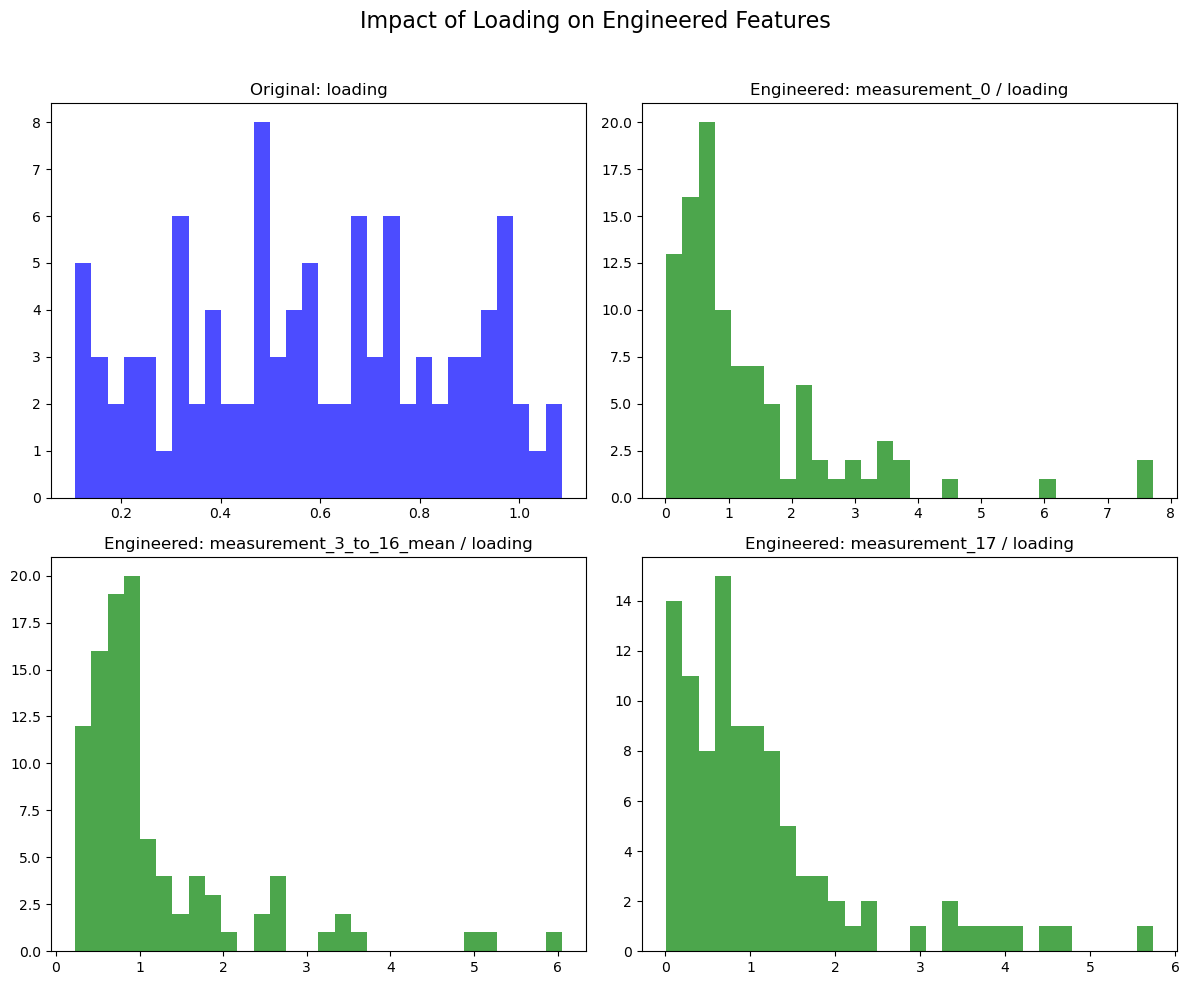

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Impact of Loading on Engineered Features', fontsize=16)

# Plot histograms for the loading column
axes[0, 0].hist(df['loading'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Original: loading')

# Compare with an engineered feature
axes[0, 1].hist(df_transformed['measurement_0 / loading'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Engineered: measurement_0 / loading')

# Another comparison with an engineered feature
axes[1, 0].hist(df_transformed['measurement_3_to_16_mean / loading'], bins=30, color='green', alpha=0.7)
axes[1, 0].set_title('Engineered: measurement_3_to_16_mean / loading')

# Histogram of the last engineered feature related to loading
axes[1, 1].hist(df_transformed['measurement_17 / loading'], bins=30, color='green', alpha=0.7)
axes[1, 1].set_title('Engineered: measurement_17 / loading')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

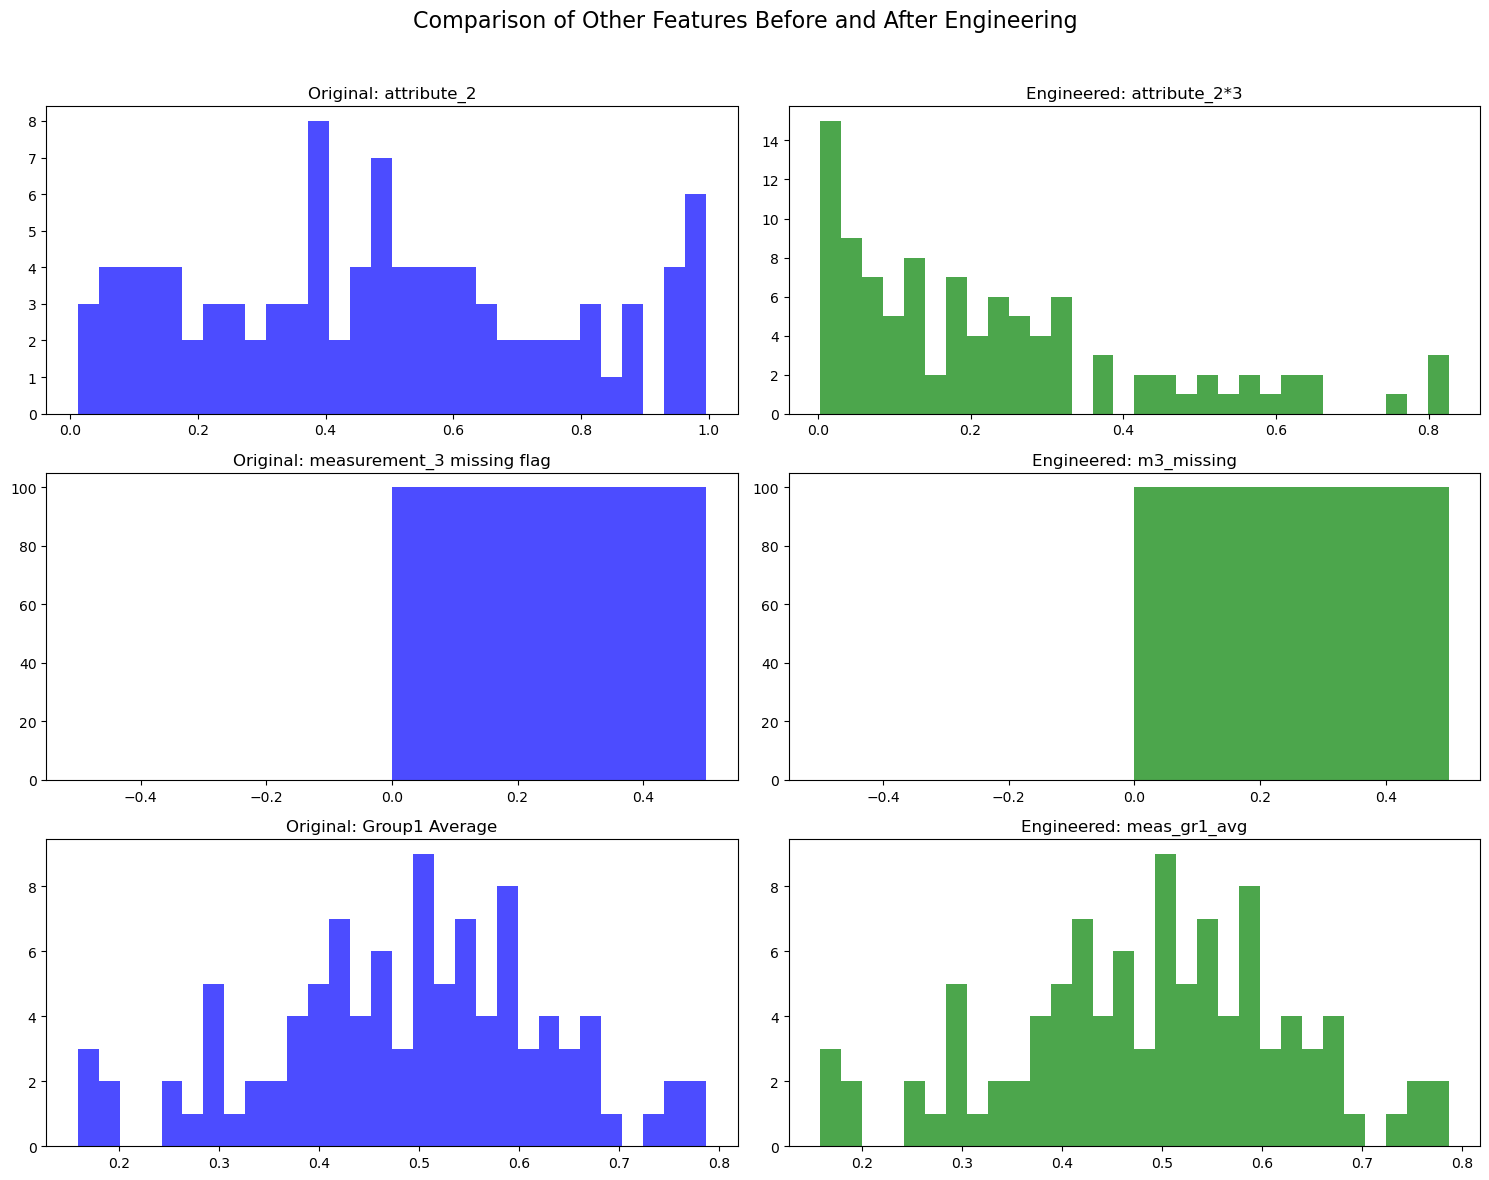

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Comparison of Other Features Before and After Engineering', fontsize=16)

# Original attributes
axes[0, 0].hist(df['attribute_2'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Original: attribute_2')

axes[0, 1].hist(df_transformed['attribute_2*3'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Engineered: attribute_2*3')

# Missing value flags
axes[1, 0].hist(df['measurement_3'].isnull().astype(np.int8), bins=2, color='blue', alpha=0.7)
axes[1, 0].set_title('Original: measurement_3 missing flag')

axes[1, 1].hist(df_transformed['m3_missing'], bins=2, color='green', alpha=0.7)
axes[1, 1].set_title('Engineered: m3_missing')

# Group statistics comparison
axes[2, 0].hist(df[['measurement_3', 'measurement_4', 'measurement_9', 'measurement_10']].mean(axis=1), bins=30, color='blue', alpha=0.7)
axes[2, 0].set_title('Original: Group1 Average')

axes[2, 1].hist(df_transformed['meas_gr1_avg'], bins=30, color='green', alpha=0.7)
axes[2, 1].set_title('Engineered: meas_gr1_avg')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<Axes: >

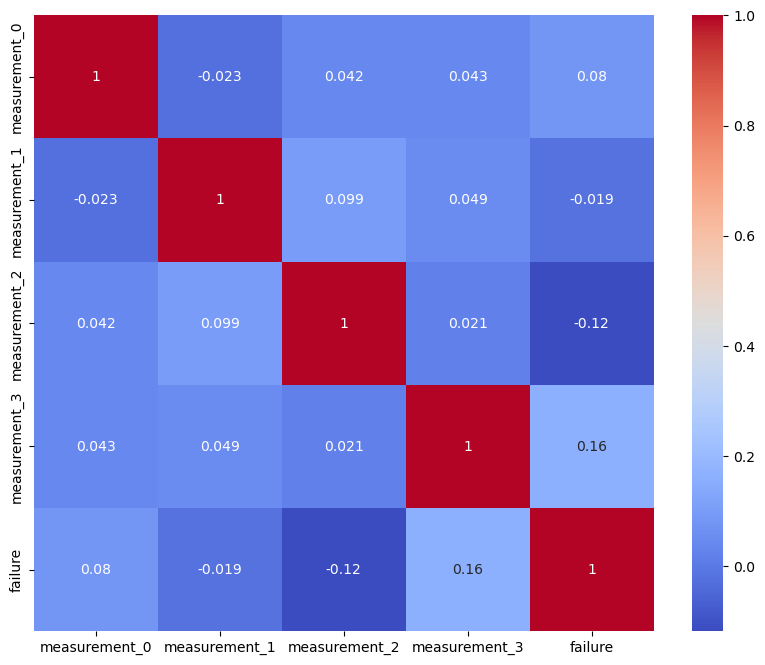

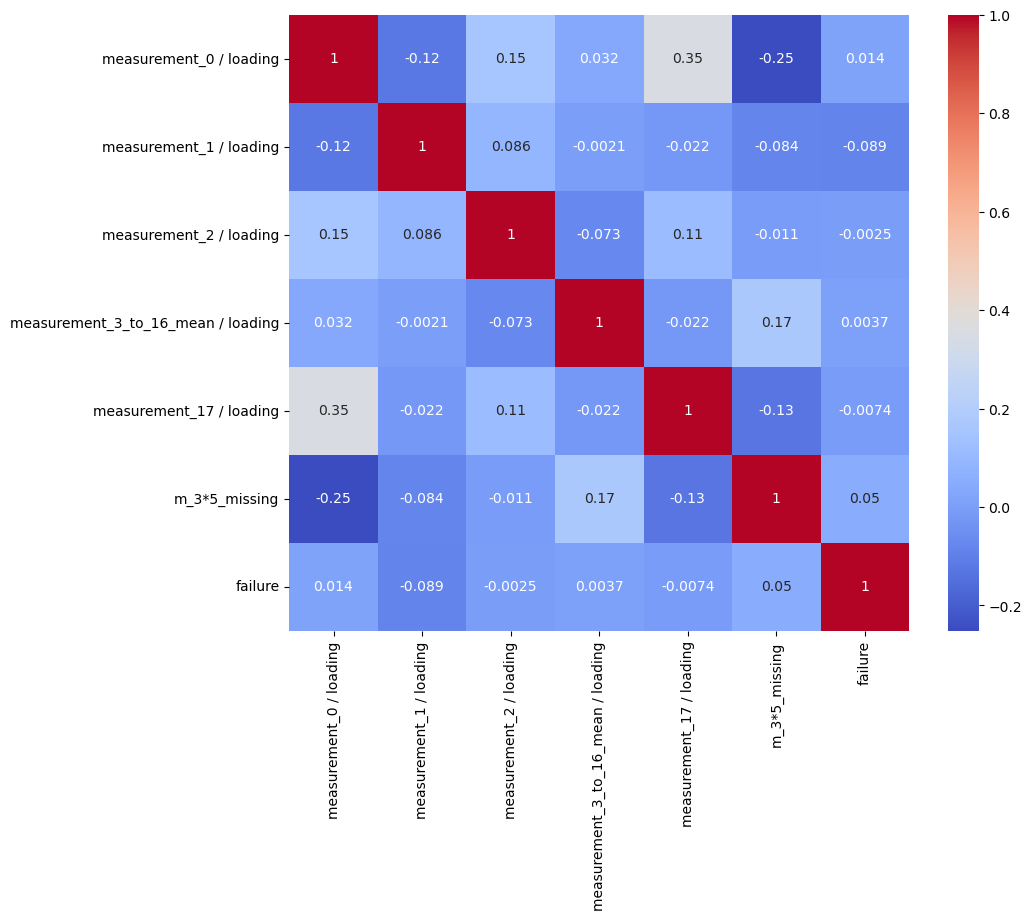

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# For original columns
plt.figure(figsize=(10,8))
sns.heatmap(df_v[["measurement_0", "measurement_1","measurement_2","measurement_3", "failure"]].corr(), annot=True, cmap="coolwarm")

# For new combined columns
plt.figure(figsize=(10,8))
sns.heatmap(df_v[["measurement_0 / loading", "measurement_1 / loading", 'measurement_2 / loading','measurement_3_to_16_mean / loading', 'measurement_17 / loading','m_3*5_missing', "failure",]].corr(), annot=True, cmap="coolwarm")

In [37]:
create_features(X_train)
create_features(X_test)
create_features(df_train)
create_features(df_test)

,id,product_code,log_loading,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,...,measurement_1 / loading,measurement_2 / loading,measurement_3_to_16_mean / loading,measurement_17 / loading,m3_missing,m5_missing,m_3*5_missing,meas_gr1_avg,meas_gr1_std,meas_gr2_avg
0,26570,F,6.901712,119.57,material_5,material_6,6,4,6,9,...,0.075270,0.050180,0.128990,5.307452,0,0,0,14.997200,3.077202,16.48850
1,26571,F,6.826676,113.51,material_5,material_6,6,4,11,8,...,0.070478,0.000000,0.132266,4.731187,0,0,0,14.596333,2.300873,15.95200
2,26572,F,6.809414,112.16,material_5,material_6,6,4,8,12,...,0.106990,0.035663,0.136051,5.875490,0,0,0,14.892400,3.018112,16.17700
3,26573,F,6.816600,112.72,material_5,material_6,6,4,8,11,...,0.097587,0.088715,0.132118,5.272365,0,0,0,14.435600,2.621204,16.03425
4,26574,F,7.700440,208.00,material_5,material_6,6,4,14,16,...,0.076923,0.038462,0.074186,3.851173,0,0,0,14.996600,2.303430,16.51600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,7.177320,144.74,material_7,material_5,9,5,0,4,...,0.027636,0.062180,0.107467,4.811842,0,0,0,15.205625,3.121584,16.25300
20771,47341,I,6.219749,74.53,material_7,material_5,9,5,4,8,...,0.107339,0.093922,0.200349,8.228217,0,0,0,14.616400,2.657154,15.98400
20772,47342,I,6.081723,67.73,material_7,material_5,9,5,10,11,...,0.162410,0.029529,0.237124,11.565761,0,0,0,15.658000,3.330515,16.96575
20773,47343,I,6.978996,126.15,material_7,material_5,9,5,8,16,...,0.126833,0.087198,0.122965,5.907333,0,0,0,14.950700,3.040512,16.91525


In [46]:
XX_columns = [
    'loading',
    'attribute_0',
    'attribute_1',
    'attribute_2*3',
    
    'measurement_0 / loading',
    'measurement_1 / loading',
    'measurement_2 / loading',
    'measurement_3_to_16_mean / loading',
    'measurement_17 / loading',
    
    'm3_missing',
    'm5_missing',
    #'m_3*5_missing',
    #'meas_gr1_avg',
    #'meas_gr1_std', 
    #'meas17/meas_gr2_avg'
] 

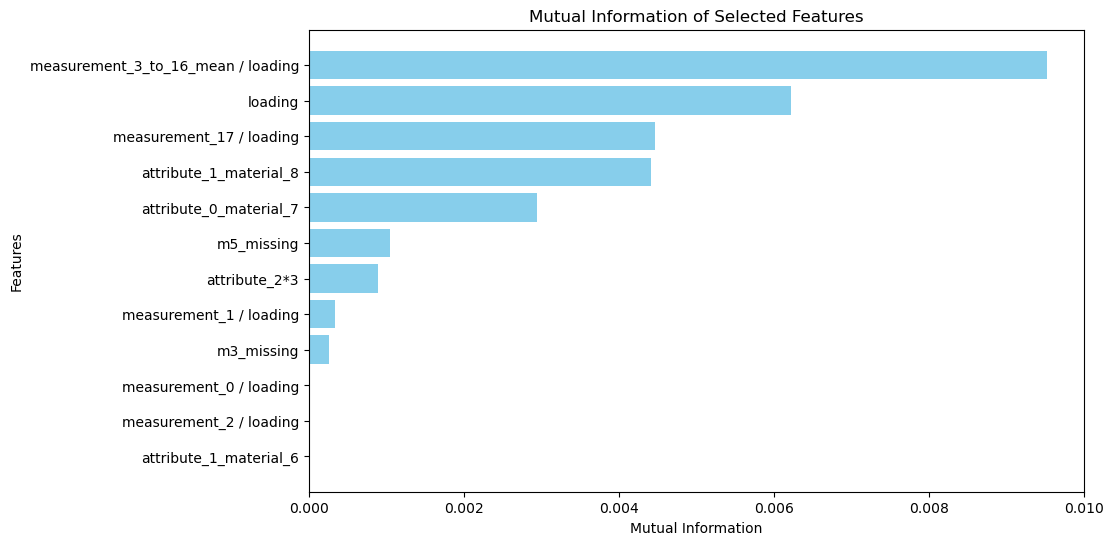

                               Feature  Mutual Information
5   measurement_3_to_16_mean / loading            0.009525
0                              loading            0.006219
6             measurement_17 / loading            0.004462
11              attribute_1_material_8            0.004414
9               attribute_0_material_7            0.002950
8                           m5_missing            0.001045
1                        attribute_2*3            0.000895
3              measurement_1 / loading            0.000336
7                           m3_missing            0.000265
2              measurement_0 / loading            0.000000
4              measurement_2 / loading            0.000000
10              attribute_1_material_6            0.000000


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Ensure that X_train and y_train are aligned and have the same number of samples
# Select only the columns specified in XX_columns
X_selected = X_train[XX_columns].copy()

# Ensure that the indices of X_selected and y_train are aligned
# This is important after any preprocessing that might have affected row alignment
X_selected, y_train = X_selected.align(pd.Series(y_train, index=X_selected.index), join='inner', axis=0)

# Convert categorical variables to numeric using one-hot encoding, if any
X_selected = pd.get_dummies(X_selected, drop_first=True)

# Ensure all data is numeric (coerce any non-numeric data to NaN)
X_selected = X_selected.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaNs (if any were introduced due to coercion)
X_selected.dropna(inplace=True)
y_train = y_train.loc[X_selected.index]  # Align y_train with the filtered X_selected

# Convert y_train to a Pandas Series if it’s still a NumPy array
y_train = pd.Series(y_train)

# Calculate mutual information between selected features and target variable
mutual_info = mutual_info_classif(X_selected, y_train)

# Create a DataFrame to store the results
mutual_info_df = pd.DataFrame({
    'Feature': X_selected.columns,  # Use the columns after preprocessing
    'Mutual Information': mutual_info
})

# Sort the features by their mutual information values
mutual_info_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information of Selected Features')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

# Display the mutual information scores
print(mutual_info_df)


In [38]:
X_columns = [
    'loading',
    'attribute_0',
    'attribute_1',
    'attribute_2*3',
    
    'measurement_0 / loading',
    'measurement_1 / loading',
    'measurement_2 / loading',
    'measurement_3_to_16_mean / loading',
    'measurement_17 / loading',
    
    'm3_missing',
    'm5_missing',
    #'m_3*5_missing',
    #'meas_gr1_avg',
    #'meas_gr1_std', 
    #'meas17/meas_gr2_avg'
] 

In [39]:
X_train[X_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21256 entries, 2596 to 26477
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   loading                             21063 non-null  float64 
 1   attribute_0                         21256 non-null  category
 2   attribute_1                         21256 non-null  category
 3   attribute_2*3                       21256 non-null  int64   
 4   measurement_0 / loading             21063 non-null  float64 
 5   measurement_1 / loading             21063 non-null  float64 
 6   measurement_2 / loading             21063 non-null  float64 
 7   measurement_3_to_16_mean / loading  21063 non-null  float64 
 8   measurement_17 / loading            19246 non-null  float64 
 9   m3_missing                          21256 non-null  int8    
 10  m5_missing                          21256 non-null  int8    
dtypes: category(2), float64(6), in

In [40]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegressionCV

# Define custom feature engineering as a function
def create_features(df):
    df = df.copy()
    # Create a new feature by multiplying 'attribute_2' and 'attribute_3'
    df['attribute_2*3'] = df['attribute_2'] * df['attribute_3']

    # Create features by dividing measurements by the 'loading' column
    df['measurement_0 / loading'] = df['measurement_0'] / df['loading']
    df['measurement_1 / loading'] = df['measurement_1'] / df['loading']
    df['measurement_2 / loading'] = df['measurement_2'] / df['loading']
    df['measurement_3_to_16_mean / loading'] = df[[f"measurement_{x:d}" for x in range(3,17)]].mean(axis='columns') / df['loading']
    df['measurement_17 / loading'] = df['measurement_17'] / df['loading']

    # Create new binary features indicating if 'measurement_3' and 'measurement_5' are missing
    df['m3_missing'] = df['measurement_3'].isnull().astype(np.int8)
    df['m5_missing'] = df['measurement_5'].isnull().astype(np.int8)
    # Create a new feature by multiplying the missing indicators for 'measurement_3' and 'measurement_5'
    df['m_3*5_missing'] = df['m3_missing'] * df['m5_missing']

    # Calculate the average and standard deviation of a group of measurement columns
    meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 5)) + list(range(9, 17))]
    df['meas_gr1_avg'] = np.mean(df[meas_gr1_cols], axis=1)
    df['meas_gr1_std'] = np.std(df[meas_gr1_cols], axis=1)

    # Calculate the average of another group of measurement columns
    meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(5, 9))]
    df['meas_gr2_avg'] = np.mean(df[meas_gr2_cols], axis=1)

    # Create a new feature by dividing 'measurement_17' by the average of the second group of measurements
    df['meas17/meas_gr2_avg'] = df['measurement_17'] / df['meas_gr2_avg']

    return df

# Function to apply log transformation to specific columns
def apply_log_transform(df):
    df = df.copy()
    # Apply log transformation (using log(1 + x) to handle zero and negative values)
    df['attribute_2*3'] = np.log1p(df['attribute_2*3'])
    df['measurement_0 / loading'] = np.log1p(df['measurement_0 / loading'])
    df['measurement_1 / loading'] = np.log1p(df['measurement_1 / loading'])
    df['measurement_2 / loading'] = np.log1p(df['measurement_2 / loading'])
    return df

# Feature engineering pipeline
fe_pipeline = Pipeline(steps=[
    ('create_features', FunctionTransformer(func=create_features, validate=False)),
    ('log_transform', FunctionTransformer(func=apply_log_transform, validate=False)),
])

# Combine feature engineering and preprocessing into a single pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), [x for x in X_columns if df_train[x].dtype == "object"]),
    ('int', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), [x for x in X_columns if df_train[x].dtype == "int"]),
    ('float', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean', add_indicator=True)),
        ('scaler', StandardScaler())
    ]), [x for x in X_columns if df_train[x].dtype == "float"])
])

# Final pipeline including feature engineering, preprocessing, and the model
fe_logistic_regression_pipeline = Pipeline(steps=[
    ('feature_engineering', fe_pipeline),
    ('preprocessor', preprocessor),
    ('model', LogisticRegressionCV(
        random_state=0, cv=5,
        scoring="roc_auc",
        penalty='elasticnet', 
        l1_ratios=np.arange(0, 1.01, 0.1), 
        Cs=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
        solver='saga',
        tol=1e-3, max_iter=5000
    ))
])


In [41]:
fe_logistic_regression_pipeline.fit(X_train, y_train)


Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('create_features',
                                  FunctionTransformer(func=<function create_features at 0x000001E406A17740>)),
                                 ('log_transform',
                                  FunctionTransformer(func=<function apply_log_transform at 0x000001E406A140E0>))])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                                                   'measurement_0 / loading',
                                                   'measurement_1 / loading',
                                                   'measurement_2 / loading',
                                                   'measurement_3_to_16_mean / '
                                                   'loading',
                                                   'measurement_17 / '
                                                   'loading'])])),
                ('model',
                 LogisticRegressionCV(Cs=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                          1.0],
                                      cv=5,
                                      l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                      max_iter=5000, penalty='elasticnet',
                                      random_state=0, scoring='roc_auc',
                                      solver='saga', tol=0.001))])

In [42]:
y_predict_fe_log_regress = fe_logistic_regression_pipeline.predict(X_test)
y_predict_proba_fe_regress = fe_logistic_regression_pipeline.predict_proba(X_test)[:,1]
roc_score_fe_regress = roc_auc_score(y_test, y_predict_proba_fe_regress)
print(f"Logistic Regression Model: ROC Score = {roc_score_fe_regress : .4f}")

Logistic Regression Model: ROC Score =  0.5855


In [43]:
op=pd.DataFrame(data={'id':df_test['id'],'failure':best_lr.predict(df_test)})
op.to_csv('LR+TuneSearch+10Stratfold.csv',index=False)
 

In [44]:
f1_log_regress = f1_score(y_test, y_predict_log_regress)
accuracy_log_regress = accuracy_score(y_test, y_predict_log_regress)
print(f"Logistic Model: F1 Score = {f1_log_regress :0.4f}, Accuracy = {accuracy_log_regress :0.4f}")

Logistic Model: F1 Score = 0.3559, Accuracy = 0.5702
